# K-NN Algorithm

In [1]:
# importing libriaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math 
import os
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
# import data
train = pd.read_csv('train.csv', index_col=0)
y = pd.read_csv('train_answers.csv', index_col=0)
test = pd.read_csv('test.csv', index_col=0)
answers = pd.read_csv('real_answers_for_test.csv', index_col=0)

In [3]:
def apply_knn(train, y, test, k):
    #list of predicted values
    predictions = []
    
    for _, row in test.iterrows():
        
        #list of distances btw test row and rows in train data
        distLst = [np.linalg.norm(row - train_row) for _, train_row in train.iterrows()]
        
        #find the k-nearest points
        lst_of_indicies = np.array(distLst).argsort()[:k]
        
        # get labels of these points
        possible_answers = y.iloc[lst_of_indicies].transpose().values.tolist()
        possible_answers = np.array(possible_answers[0])
        
        # find most frequent label and add it to list of predictions
        values, counts = np.unique(possible_answers, return_counts=True)
        ind = np.argmax(counts)
        predictions.append(values[ind])
    return predictions

In [4]:
def accuracy(predicts, answers):
    c = 0
    for i in range(len(answers)):
        if predicts[i] == answers.iloc[i][0]:
            c+=1
    return c / len(answers)

In [5]:
dictionary_for_accuracy = {}
for i in range(1, 10, 2):
    predicted_values = apply_knn(train, y, test, i)
    dictionary_for_accuracy[i] = accuracy(predicted_values, answers)

<AxesSubplot:>

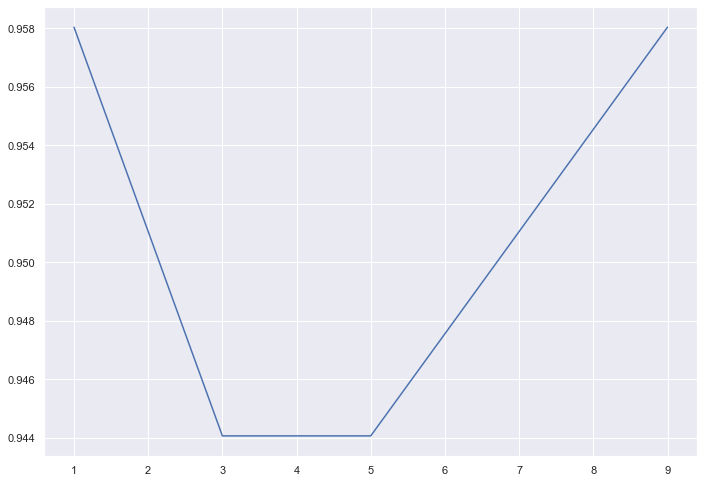

In [6]:
sns.lineplot(y=dictionary_for_accuracy.values(), x=dictionary_for_accuracy.keys())

# K-Means Algorithm

In [7]:
from scipy.spatial.distance import euclidean
from scipy.io import loadmat

In [8]:
# import data
data = loadmat('ex7data2.mat')['X']
centroids = np.array([[3, 3], [6, 2], [8, 5]])
n_iters = 10

In [9]:
def findClosestCentroids(data, centroids):
    # list of labels
    idx = []
    
    #for each point
    for row in data:
        
        #calculate distance to each centroid
        dist_list = [euclidean(row, centroid) for centroid in centroids]
        
        # find closest centroid
        index = np.array(dist_list).argsort()[:1]
        
        # add centroid to list of labels
        idx.append(index[0])
        
    return idx

def computeCentroids(data, idx, centroids):
    n = len(centroids)
    centroids = []
    
    # for each centroid
    for i in range(n):
        coords = []
        
        # find X and Y coords of points which labeled by this centroid
        for ind, row in zip(idx, data):
            if ind == i:
                coords.append(row)
        
        # calculate new coordinates for centroid
        centroids.append(np.array(coords).mean(axis=0))
    return centroids

In [10]:
n_iters = 10
for _ in range(n_iters):
    idx = findClosestCentroids(data, centroids)
    centroids = computeCentroids(data, idx, centroids)

[]

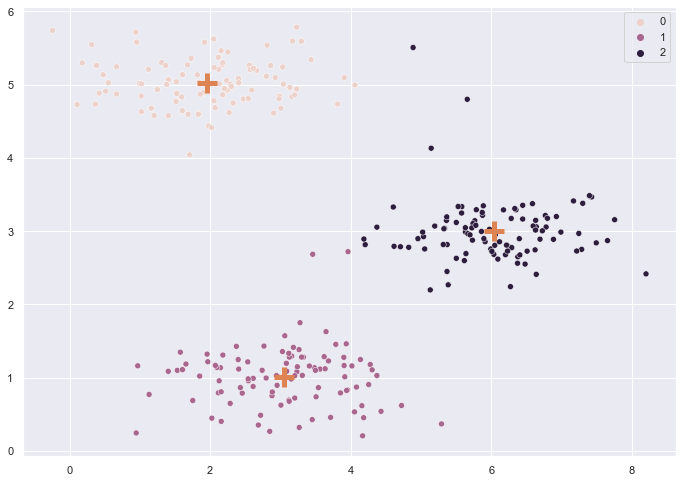

In [11]:
fig = sns.scatterplot(x = data[:, 0], y = data[:, 1], hue = idx) 
fig.scatter(x = np.array(centroids)[:, 0], y = np.array(centroids)[:, 1], s=400, marker='+', linewidth=5) 
fig.plot()